# Mininum energy control of a crane


Consider the crane depicted in Figure 1. In this live script we solve the 
following problem:

How to move a crane from rest at point A to rest at point B in a fixed amount 
of time $T$  with minimum energy $\min \int_0^T u(t)^2 dt$?

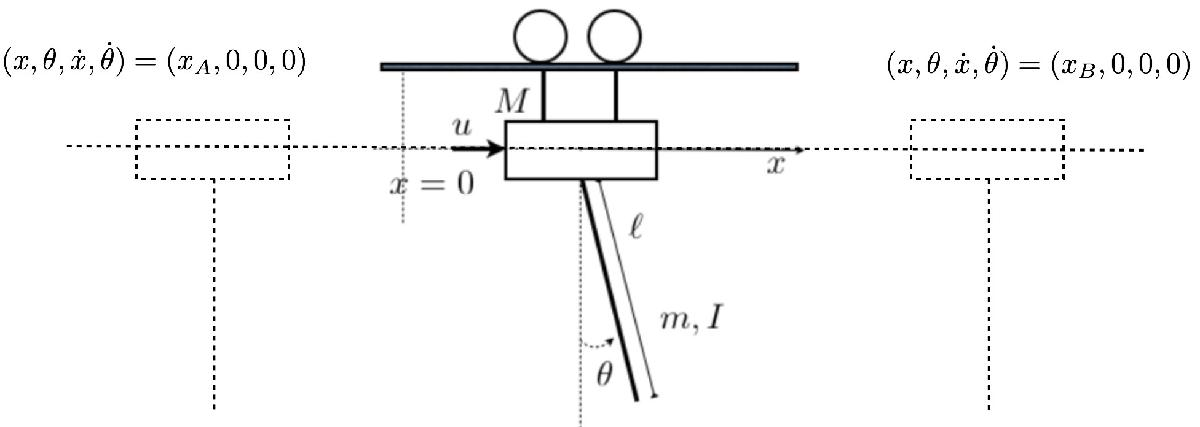

<center>Figure 1: Crane</center>


To solve this problem we start by considering the linearized model of a crane 
which is

$$ (I+m\ell^2)\ddot{\theta}+mh\ell\theta = -m\ell \ddot{x}_1 $$

$$(M+m)\ddot{x}+b\dot{x}+m\ell \ddot{\theta}=u$$

which can be written is state space form as



$$\frac{d}{dt}\left[\matrix{x \cr \dot{x} \cr \theta   \cr \dot{\theta} }\right] 
= \left[\matrix{0 & 1 & 0 & 0 \cr 0 & -\frac{(I+m\ell^2)b}{q} & \frac{m^2g\ell^2}{q} 
&0 \cr 0 & 0 & 0 & 1   \cr 0 & \frac{m\ell b}{q} & -\frac{m g\ell (M+m)}{q} 
&0 }\right]\left[\matrix{x \cr \dot{x} \cr \theta   \cr \dot{\theta} }\right]+\left[\matrix{0 
\cr \frac{I+m\ell^2}{q} \cr 0  \cr -\frac{m\ell}{q} }\right]u$$

where $q=(I+m\ell^2)(M+m)-m^2\ell^2$.

We can then write the problem in the canonical form

$$\min \int_0^T x^T Qx+u^TRudt$$

$$\dot{x}=Ax+Bu$$

subject to $x(0)=x_0$ and $x(T) = x_f$for $Q=0$ and $R=I$ and where $x$, $A$ 
and $B$ can be obtained from the model above and $x_0$ and $x_f$ are given constant 
vectors.

A standard application of the Pontryagin's maximum principle given the necessary 
optimality conditions

$$\left[ \matrix{\dot{x} \cr \dot{\lambda}}\right] =\left[ \matrix{ A & -BR^{-1}B^T 
\cr -Q & -A^T}\right] \left[ \matrix{{x} \cr {\lambda}}\right]  $$

$$u = -R^{-1}B^T \lambda$$

for $t\in [0,T]$. Since we know the explicit solution to this equation, we 
can impose the boundary conditions, leading to a system with two unknows: $n$ 
dimensional vectors $\lambda(0)$ and $\lambda(T)$ and $2n$ equations. In fact, 
we have that

$$\left[ \matrix{x(T) \cr \lambda(T)}\right] =\underbrace{e^{\left[ \matrix{ 
A & -BR^{-1}B^T \cr -Q & -A^T}\right]T} }_{H}\left[ \matrix{{x}(0) \cr {\lambda}(0)}\right]  
$$

where $x(T)$ and $x(0)$ are known and $\lambda(T)$ and $\lambda(0)$ are unknown. 
Let us partition $H$ as 

$$H=\left[\matrix{H_{11} & H_{12} \cr H_{21} & H_{22}}\right].$$

Then from the first $n$ equations of the systems of $2n$ equations we can 
obtain

$$\lambda(0)=H_{12}^{-1}(x(T)-H_{11}x(0))$$

Note that once $\lambda(0)$ is known, the optimal state, co-state and control 
input can be obtained from

$$\left[ \matrix{x(t) \cr \lambda(t)}\right] ={e^{\left[ \matrix{ A & -BR^{-1}B^T 
\cr -Q & -A^T}\right]t} }\left[ \matrix{{x}(0) \cr {\lambda}(0)}\right] , t\in [0,T],$$

$$u(t)=-R^{-1}B^T\lambda(t), t\in [0,T]$$ 

This is applied to the original problem in the following script.

In [ ]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

In [ ]:
# system parameters
m = 0.2
M = 1
b = 0.05
I = 0.01
g = 9.8
l = 0.5
p = (I+m*l**2)*(M+m)-m**2*l**2
Ac = np.array([[0,      1,              0,           0],
    [0, -(I+m*l**2)*b/p,  (m**2*g*l**2)/p,   0],
    [0,      0,              0,           1],
    [0,  (m*l*b)/p,       -m*g*l*(M+m)/p,  0]])
Bc = np.array([[     0],
    [(I+m*l**2)/p],
    [0],
    [-m*l/p]])
Qc = np.zeros((4,4))
Rc = 1
n = 4
T = 1
x0 = np.array([[0], [0], [0], [0]])
xf = np.array([[1], [0], [0], [0]])

# 1 Compute matrix defining the linear system with 2 n equations
aux = np.vstack((np.hstack((Ac, -Bc@Bc.T)) , np.hstack((-Qc,-Ac.T))))*T
H = scipy.linalg.expm(aux)
H11 = H[0:n,0:n]
H12 = H[0:n,n:2*n]
H21 = H[n:2*n,0:n]
H22 = H[n:2*n,n:2*n]

# 2 obtain lambda0
lambda0 = np.linalg.lstsq(H12,(xf-H11@x0), rcond=None)[0]

# 3 obtain x, lambda, u at times ktau
tau = 0.01
N = int(T/tau)
x = np.zeros((4,N+1))
lmbda = np.zeros((4,N+1))
u = np.zeros((1,N+1))
for k in range(N+1):
    XL = scipy.linalg.expm( k*np.vstack((np.hstack((Ac,-Bc@Bc.T)),np.hstack((-Qc,-Ac.T)))) * tau )@np.vstack((x0,lambda0))
    x[:,[k]] = XL[0:4]
    lmbda[:,[k]] = XL[4:8]
    u[:,[k]] = -Bc.T@lmbda[:,[k]]

In [ ]:
f = plt.figure()
ax = f.gca()
ax.plot(np.arange(N+1)*tau,u[0])
ax.set_xlabel('t')
ax.set_ylabel('u')
ax.grid(True)

In [ ]:
f = plt.figure()
ax = f.gca()
ax.plot(np.arange(N+1)*tau,x[2,:])
ax.set_xlabel('t')
ax.set_ylabel(r'$\theta$')
ax.grid(True)

In [ ]:
f = plt.figure()
ax = f.gca()
ax.plot(np.arange(N+1)*tau,x[0,:])
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.grid(True)